In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
import sqlite3
import pandas as pd
import os

In [3]:
pd.set_option('display.max_column', None)
my_filepath = "train.csv"
t_data = pd.read_csv(my_filepath)
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [4]:
t_data['Survived'] = t_data['Survived'].map({1: 'Yes', 0: 'No'})
t_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,Yes,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,No,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,No,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,No,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,Yes,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,Yes,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,No,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,No,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,No,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [5]:
t_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,3.000000,87.000000,8.000000,9.000000,744.66000


<Figure size 960x800 with 0 Axes>

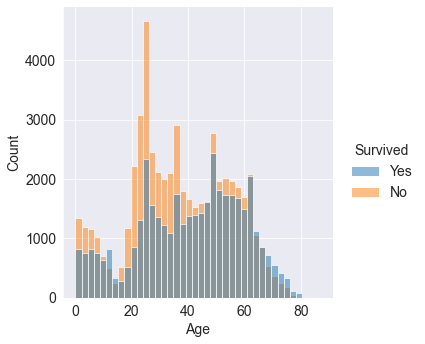

In [6]:
"""Рассмотрим возрастные группы пассажиров и посмотрим, какого возраста пассажиров больше на корабле, 
а так же посмотрим на вероятность выживания исходя из возраста"""
plt.figure(figsize=(12, 10), dpi=80)
age1=t_data['Age'].dropna()
sns.displot(data=t_data, x="Age", hue="Survived", bins=40)
plt.show()

In [11]:
# rr = t_data.groupby(['Pclass', 'Survived', 'Sex']).Pclass.count().rename('Values').to_frame().stack()
# sns.displot(data=rr, x='Pclass', y='Values', hue="Survived", bins=20)

In [8]:
# t_data_by_Pclass = t_data.groupby('Pclass')
# t_data_by_Pclass

In [9]:
"""Возможно то, что те, даннные, которые отсутствуют в таблице по билетам, каютам, и возрасту пассажиров говорят нам о том, что
пассажир не выжил и не смог дать эту информацию. Номер билета запомнить сложно, а вот номер кабины можно и запомнить"""
T_data = t_data.fillna("Unknown")
T_data_Unknown = T_data[((T_data['Cabin'] == 'Unknown') | (T_data['Age'] == 'Unknown')) & (T_data['Ticket'] == 'Unknown')]
T_data_Unknown

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,16,No,3,"Feller, Jimmie",male,53.0,0,0,Unknown,7.92,Unknown,S
31,31,Yes,3,"Hollander, Richard",male,7.0,1,0,Unknown,28.75,Unknown,S
84,84,No,2,"Herrin, Barbara",female,11.0,0,0,Unknown,9.12,Unknown,S
98,98,Yes,2,"Bohn, Teresa",female,8.0,0,0,Unknown,27.88,Unknown,S
112,112,No,3,"Garner, Mildred",female,39.0,0,0,Unknown,8.29,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99940,99940,No,3,"Williamson, Arnoldo",male,25.0,0,0,Unknown,9.89,Unknown,S
99943,99943,Yes,3,"Reyes, Lori",female,61.0,3,0,Unknown,9.92,Unknown,S
99968,99968,Yes,2,"Pickett, Kimberly",female,67.0,3,3,Unknown,32.38,Unknown,S
99978,99978,No,3,"Merritt, John",male,26.0,0,0,Unknown,11.44,Unknown,S


'Хотя по графикам этого не видно'

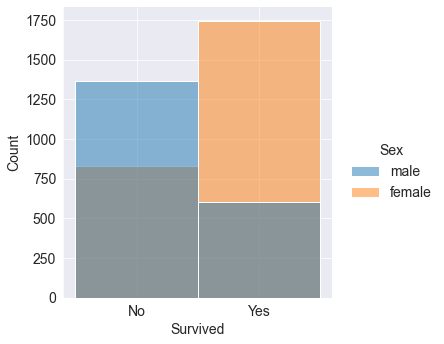

In [10]:
sns.displot(data=T_data_Unknown, x="Survived", hue="Sex", bins=20)
"""Хотя по графикам этого не видно"""